In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble, model_selection, metrics, naive_bayes, linear_model, feature_extraction, metrics 
import matplotlib.pyplot as plt 
import seaborn as sb
import os
import bnlearn
import itertools

In [2]:
currentFolder = os.getcwd()
data = pd.read_csv(currentFolder + '/data/heart.csv') #downloaded from https://www.kaggle.com/johnsmith88/heart-disease-dataset
data = data.astype('int')
print(data.shape)
data.head(5)

(1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1,1,3,2,0


Start with removing any rows with NaN or empty cells

In [3]:
data.replace('', np.nan, inplace=True)
data = data.dropna(axis = 0)

Most variables appears to be binary but some are not so let's look at them.

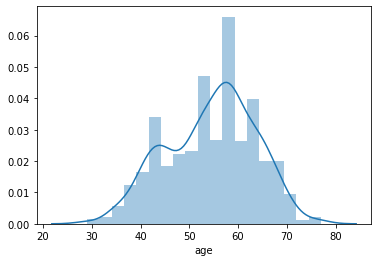

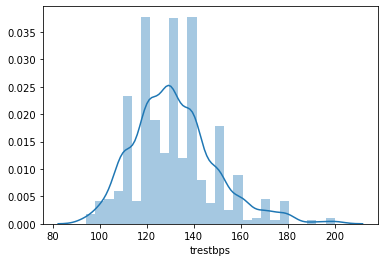

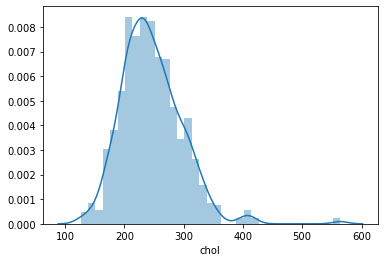

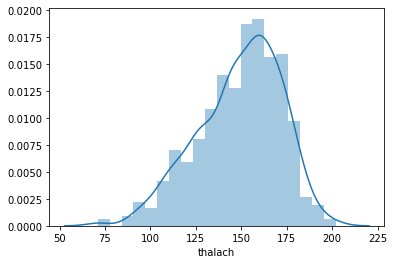

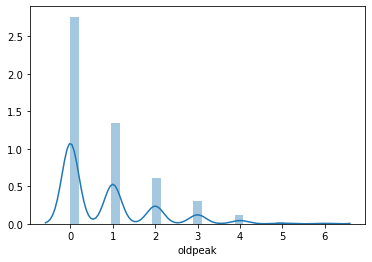

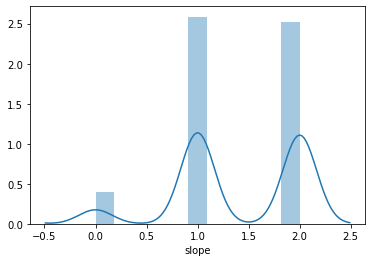

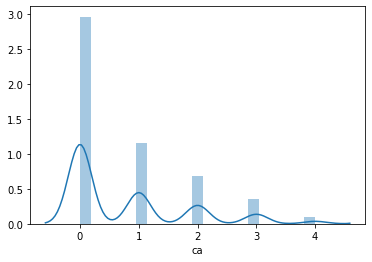

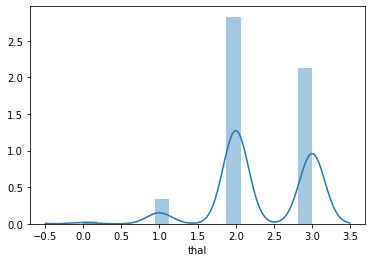

In [4]:
columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca','thal']
for c in columns:
    plt.figure()
    sb.distplot(data[c])
    plt.show()

For simplicity sake we'll transform the more continous variables into discret ones before splitting the data, in a real world scenario we'd have to save the transformation for each column and then apply it to new data. In this case we'll bin the data into being one std below or above the mean, so three intervalls

In [5]:
data['age'] = pd.cut(x = data['age'], bins = [0, data['age'].mean() - data['age'].std(), data['age'].mean() + data['age'].std(), data['age'].max()], labels = [0, 1, 2])
data['trestbps'] = pd.cut(x = data['trestbps'], bins = [0, data['trestbps'].mean() - data['trestbps'].std(), data['trestbps'].mean() + data['trestbps'].std(), data['trestbps'].max()], labels = [0, 1, 2])
data['chol'] = pd.cut(x = data['chol'], bins = [0, data['chol'].mean() - data['chol'].std(), data['chol'].mean() + data['chol'].std(), data['chol'].max()], labels = [0, 1, 2])
data['thalach'] = pd.cut(x = data['thalach'], bins = [0, data['thalach'].mean() - data['thalach'].std(), data['thalach'].mean() + data['thalach'].std(), data['thalach'].max()], labels = [0, 1, 2])

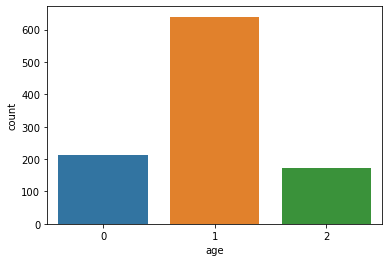

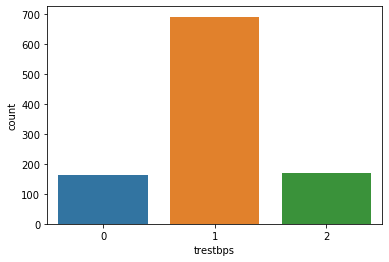

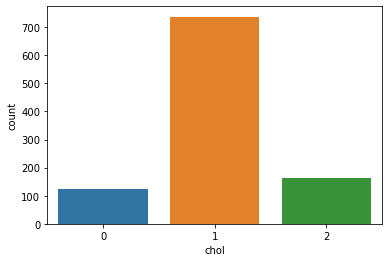

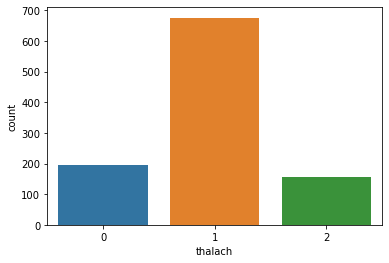

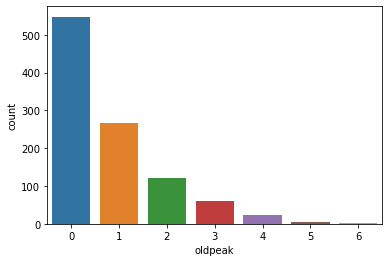

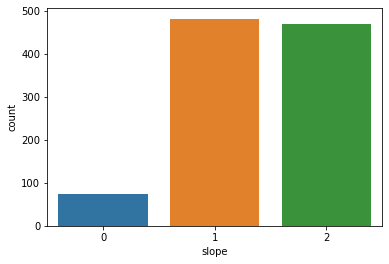

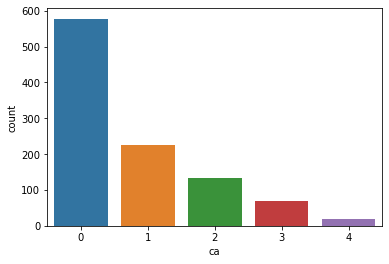

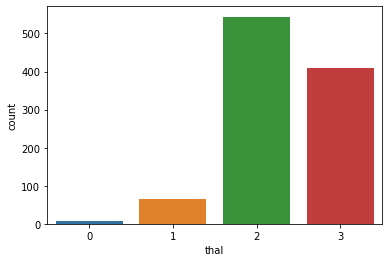

In [6]:
columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca','thal']
for c in columns:
    plt.figure()
    sb.countplot(data[c])
    plt.show()

In [7]:
target = data.pop('target')
data_train, data_test, target_train, target_test = model_selection.train_test_split(data, target, test_size=0.2, random_state=42)

C:\Users\Asus\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<Figure size 720x360 with 0 Axes>

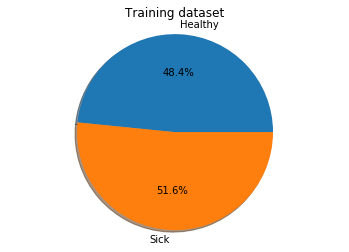

C:\Users\Asus\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 720x360 with 0 Axes>

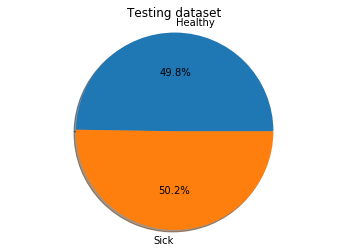

In [8]:
data_train = data_train
data_train['target'] = target_train
tmp_data_healthy = data_train.loc[data_train['target'] == 0]
tmp_data_sick = data_train.loc[data_train['target'] == 1]

plt.figure(1, figsize=(10,5))
labels = ['Healthy', 'Sick']
number = [len(tmp_data_healthy), len(tmp_data_sick)]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set(title = 'Training dataset') 
plt.show()


tmp_test = data_test
tmp_test['target'] = target_test
tmp_data_test_healthy = data_test.loc[tmp_test['target'] == 0]
tmp_data_test_sick = data_test.loc[tmp_test['target'] == 1]

plt.figure(2, figsize=(10,5))
labels = ['Healthy', 'Sick']
number = [len(tmp_data_test_healthy), len(tmp_data_test_sick)]
fig1, ax1 = plt.subplots()
ax1.pie(number, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set(title = 'Testing dataset') 
plt.show()

[BNLEARN][STRUCTURE LEARNING] Warning: Computing DAG with 14 nodes can take a very long time!
[BNLEARN][STRUCTURE LEARNING] Computing best DAG using [hc]
[BNLEARN][STRUCTURE LEARNING] Set scoring type at [bic]
{'model': <pgmpy.base.DAG.DAG object at 0x0000025D3459B1C8>, 'model_edges': OutEdgeView([('age', 'thalach'), ('age', 'trestbps'), ('age', 'fbs'), ('cp', 'target'), ('cp', 'exang'), ('thalach', 'chol'), ('exang', 'target'), ('slope', 'oldpeak'), ('slope', 'thalach'), ('ca', 'age'), ('thal', 'sex'), ('target', 'thal'), ('target', 'ca'), ('target', 'slope'), ('target', 'oldpeak'), ('target', 'restecg'), ('target', 'sex')]), 'adjmat': target      age    sex     cp  trestbps   chol    fbs  restecg  thalach  \
source                                                                    
age       False  False  False      True  False   True    False     True   
sex       False  False  False     False  False  False    False    False   
cp        False  False  False     False  False  False  

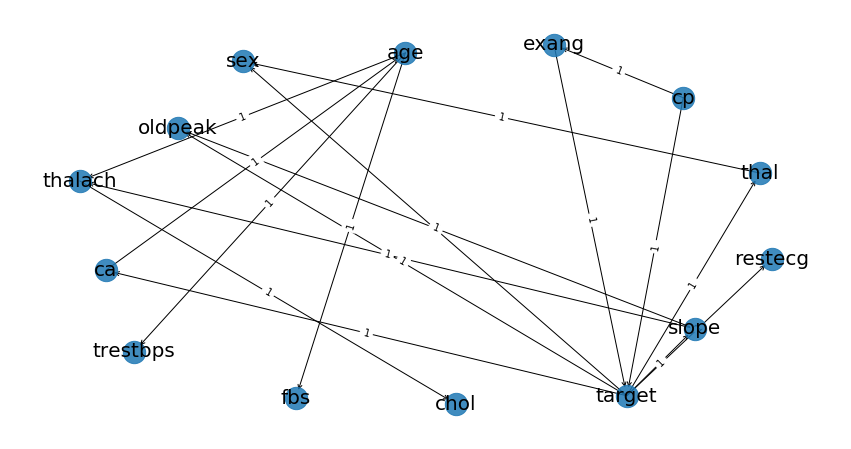

{'pos': {'age': array([-0.06404192,  0.90037709]), 'sex': array([-0.53096406,  0.85599597]), 'cp': array([0.73464674, 0.66542419]), 'trestbps': array([-0.8438985 , -0.66464302]), 'chol': array([ 0.08155244, -0.93902728]), 'fbs': array([-0.37922911, -0.9077675 ]), 'restecg': array([ 0.98844058, -0.18008893]), 'thalach': array([-1.        ,  0.22960497]), 'exang': array([0.36283338, 0.94338405]), 'oldpeak': array([-0.71825883,  0.50431532]), 'slope': array([ 0.76716632, -0.54395589]), 'ca': array([-0.92561048, -0.23899167]), 'thal': array([0.95504859, 0.27079714]), 'target': array([ 0.57231484, -0.89542444])}, 'G': <networkx.classes.digraph.DiGraph object at 0x0000025D34598D48>}


In [9]:
model = bnlearn.structure_learning.fit(data_train, methodtype = 'hc', scoretype = 'bic') #options for method is 'hc'and 'ex'
                                                                                        #and for score 'k2', 'bdeu'
print(model)
print(bnlearn.plot(model))

[BNLEARN][PARAMETER LEARNING] Computing parameters using [bayes]
[BNLEARN] Conversion of adjmat to BayesianModel.
CPD of age:
+--------+---------------------+---------------------+---------------------+---------------------+---------------------+
| ca     | ca(0)               | ca(1)               | ca(2)               | ca(3)               | ca(4)               |
+--------+---------------------+---------------------+---------------------+---------------------+---------------------+
| age(0) | 0.32333833083458274 | 0.20656028368794324 | 0.22841530054644807 | 0.27002583979328165 | 0.353582554517134   |
+--------+---------------------+---------------------+---------------------+---------------------+---------------------+
| age(1) | 0.4927536231884058  | 0.5177304964539007  | 0.45792349726775955 | 0.3901808785529716  | 0.33489096573208726 |
+--------+---------------------+---------------------+---------------------+---------------------+---------------------+
| age(2) | 0.18390804597701

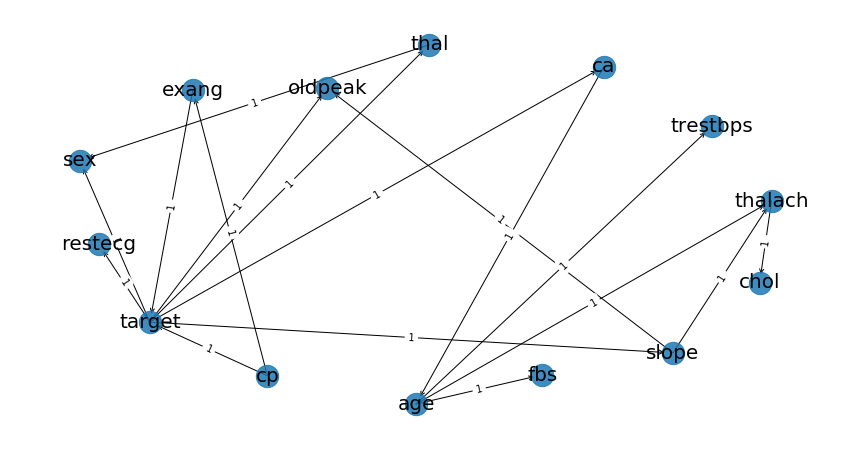

{'pos': {'age': array([-0.04052273, -0.99607618]), 'trestbps': array([0.80326804, 0.53813382]), 'fbs': array([ 0.31978487, -0.83431723]), 'thalach': array([0.97412365, 0.12669955]), 'cp': array([-0.46468598, -0.83966061]), 'exang': array([-0.67774777,  0.73917891]), 'target': array([-0.80023756, -0.54308065]), 'chol': array([ 0.93996562, -0.32526831]), 'slope': array([ 0.69271001, -0.71343504]), 'oldpeak': array([-0.29373915,  0.75019805]), 'ca': array([0.49590335, 0.86957007]), 'thal': array([-0.00235063,  0.99039709]), 'sex': array([-1.        ,  0.34951756]), 'restecg': array([-0.94647171, -0.11185702])}, 'G': <networkx.classes.digraph.DiGraph object at 0x0000025D34B979C8>}


In [10]:
model_fit = bnlearn.parameter_learning.fit(model, data_train)
print(model_fit)
print(bnlearn.plot(model_fit))

In [11]:
guesses = []
for i in range(len(data_test)):
    guess = bnlearn.inference.fit(model_fit, variables = ['target'], evidence = {'age': data_test.iloc[i,0],
                                                                                'sex': data_test.iloc[i,1],
                                                                                'cp': data_test.iloc[i,2],
                                                                                'trestbps': data_test.iloc[i,3],
                                                                                'chol': data_test.iloc[i,4],
                                                                                'fbs': data_test.iloc[i,5],
                                                                                'restecg': data_test.iloc[i,6],
                                                                                'thalach': data_test.iloc[i,7],
                                                                                'exang': data_test.iloc[i,8], 
                                                                                'oldpeak': data_test.iloc[i,9],
                                                                                'slope': data_test.iloc[i,10],
                                                                                'ca': data_test.iloc[i,11],
                                                                                'thal': data_test.iloc[i,12]})
    guesses.append(np.argmax(guess.values))

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0765 |
+-----------+---------------+
| target(1) |        0.9235 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1151 |
+-----------+---------------+
| target(1) |        0.8849 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9039 |
+-----------+---------------+
| target(1) |        0.0961 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0564 |
+-----------+---------------+
| target(1) |        0.9436 |
+-----------+-


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8430 |
+-----------+---------------+
| target(1) |        0.1570 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2052 |
+-----------+---------------+
| target(1) |        0.7948 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7879 |
+-----------+---------------+
| target(1) |        0.2121 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9786 |
+-----------+---------------+
| target(1) |        0.0214 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7661 |
+-----------+---------------+
| target(1) |        0.2339 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0890 |
+-----------+---------------+
| target(1) |        0.9110 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8435 |
+-----------+---------------+
| target(1) |        0.1565 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0525 |
+-----------+---------------+
| target(1) |        0.9475 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9542 |
+-----------+---------------+
| target(1) |        0.0458 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2088 |
+-----------+---------------+
| target(1) |        0.7912 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9522 |
+-----------+---------------+
| target(1) |        0.0478 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0525 |
+-----------+---------------+
| target(1) |        0.9475 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1688 |
+-----------+---------------+
| target(1) |        0.8312 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9667 |
+-----------+---------------+
| target(1) |        0.0333 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2516 |
+-----------+---------------+
| target(1) |        0.7484 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8586 |
+-----------+---------------+
| target(1) |        0.1414 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9488 |
+-----------+---------------+
| target(1) |        0.0512 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2516 |
+-----------+---------------+
| target(1) |        0.7484 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0899 |
+-----------+---------------+
| target(1) |        0.9101 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0332 |
+-----------+---------------+
| target(1) |        0.9668 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7909 |
+-----------+---------------+
| target(1) |        0.2091 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1055 |
+-----------+---------------+
| target(1) |        0.8945 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7132 |
+-----------+---------------+
| target(1) |        0.2868 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..


0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1991 |
+-----------+---------------+
| target(1) |        0.8009 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3455 |
+-----------+---------------+
| target(1) |        0.6545 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1151 |
+-----------+---------------+
| target(1) |        0.8849 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1204 |
+-----------+---------------+
| target(1) |        0.8796 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2202 |
+-----------+---------------+
| target(1) |        0.7798 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2516 |
+-----------+---------------+
| target(1) |        0.7484 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2746 |
+-----------+---------------+
| target(1) |        0.7254 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2892 |
+-----------+---------------+
| target(1) |        0.7108 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9786 |
+-----------+---------------+
| target(1) |        0.0214 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7674 |
+-----------+---------------+
| target(1) |        0.2326 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3289 |
+-----------+---------------+
| target(1) |        0.6711 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2794 |
+-----------+---------------+
| target(1) |        0.7206 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9557 |
+-----------+---------------+
| target(1) |        0.0443 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7618 |
+-----------+---------------+
| target(1) |        0.2382 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8238 |
+-----------+---------------+
| target(1) |        0.1762 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5828 |
+-----------+---------------+
| target(1) |        0.4172 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3289 |
+-----------+---------------+
| target(1) |        0.6711 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3343 |
+-----------+---------------+
| target(1) |        0.6657 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2239 |
+-----------+---------------+
| target(1) |        0.7761 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9692 |
+-----------+---------------+
| target(1) |        0.0308 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1835 |
+-----------+---------------+
| target(1) |        0.8165 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8435 |
+-----------+---------------+
| target(1) |        0.1565 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0332 |
+-----------+---------------+
| target(1) |        0.9668 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2892 |
+-----------+---------------+
| target(1) |        0.7108 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9786 |
+-----------+---------------+
| target(1) |        0.0214 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2200 |
+-----------+---------------+
| target(1) |        0.7800 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0748 |
+-----------+---------------+
| target(1) |        0.9252 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1524 |
+-----------+---------------+
| target(1) |        0.8476 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7909 |
+-----------+---------------+
| target(1) |        0.2091 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3343 |
+-----------+---------------+
| target(1) |        0.6657 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9488 |
+-----------+---------------+
| target(1) |        0.0512 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6227 |
+-----------+---------------+
| target(1) |        0.3773 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5924 |
+-----------+---------------+
| target(1) |        0.4076 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7618 |
+-----------+---------------+
| target(1) |        0.2382 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0466 |
+-----------+---------------+
| target(1) |        0.9534 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4112 |
+-----------+---------------+
| target(1) |        0.5888 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7909 |
+-----------+---------------+
| target(1) |        0.2091 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5828 |
+-----------+---------------+
| target(1) |        0.4172 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0525 |
+-----------+---------------+
| target(1) |        0.9475 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..



Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3578 |
+-----------+---------------+
| target(1) |        0.6422 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3597 |
+-----------+---------------+
| target(1) |        0.6403 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7879 |
+-----------+---------------+
| target(1) |        0.2121 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1128 |
+-----------+---------------+
| target(1) |        0.8872 |
+-----------+---------------+


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]



[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1654 |
+-----------+---------------+
| target(1) |        0.8346 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0525 |
+-----------+---------------+
| target(1) |        0.9475 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7345 |
+-----------+---------------+
| target(1) |        0.2655 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7727 |
+-----------+---------------+
| target(1) |        0.2273 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6075 |
+-----------+---------------+
| target(1) |        0.3925 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9522 |
+-----------+---------------+
| target(1) |        0.0478 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0731 |
+-----------+---------------+
| target(1) |        0.9269 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8912 |
+-----------+---------------+
| target(1) |        0.1088 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0890 |
+-----------+---------------+
| target(1) |        0.9110 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9046 |
+-----------+---------------+
| target(1) |        0.0954 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7345 |
+-----------+---------------+
| target(1) |        0.2655 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1055 |
+-----------+---------------+
| target(1) |        0.8945 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6155 |
+-----------+---------------+
| target(1) |        0.3845 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9667 |
+-----------+---------------+
| target(1) |        0.0333 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4056 |
+-----------+---------------+
| target(1) |        0.5944 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0765 |
+-----------+---------------+
| target(1) |        0.9235 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1654 |
+-----------+---------------+
| target(1) |        0.8346 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1770 |
+-----------+---------------+
| target(1) |        0.8230 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5924 |
+-----------+---------------+
| target(1) |        0.4076 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7471 |
+-----------+---------------+
| target(1) |        0.2529 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9144 |
+-----------+---------------+
| target(1) |        0.0856 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9226 |
+-----------+---------------+
| target(1) |        0.0774 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4962 |
+-----------+---------------+
| target(1) |        0.5038 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7983 |
+-----------+---------------+
| target(1) |        0.2017 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6405 |
+-----------+---------------+
| target(1) |        0.3595 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6111 |
+-----------+---------------+
| target(1) |        0.3889 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8543 |
+-----------+---------------+
| target(1) |        0.1457 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1937 |
+-----------+---------------+
| target(1) |        0.8063 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9786 |
+-----------+---------------+
| target(1) |        0.0214 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4693 |
+-----------+---------------+
| target(1) |        0.5307 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4112 |
+-----------+---------------+
| target(1) |        0.5888 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0466 |
+-----------+---------------+
| target(1) |        0.9534 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2200 |
+-----------+---------------+
| target(1) |        0.7800 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0466 |
+-----------+---------------+
| target(1) |        0.9534 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0624 |
+-----------+---------------+
| target(1) |        0.9376 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5417 |
+-----------+---------------+
| target(1) |        0.4583 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0919 |
+-----------+---------------+
| target(1) |        0.9081 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1208 |
+-----------+---------------+
| target(1) |        0.8792 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7311 |
+-----------+---------------+
| target(1) |        0.2689 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0525 |
+-----------+---------------+
| target(1) |        0.9475 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0957 |
+-----------+---------------+
| target(1) |        0.9043 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9435 |
+-----------+---------------+
| target(1) |        0.0565 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3670 |
+-----------+---------------+
| target(1) |        0.6330 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7242 |
+-----------+---------------+
| target(1) |        0.2758 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5695 |
+-----------+---------------+
| target(1) |        0.4305 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9488 |
+-----------+---------------+
| target(1) |        0.0512 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1654 |
+-----------+---------------+
| target(1) |        0.8346 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3597 |
+-----------+---------------+
| target(1) |        0.6403 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4112 |
+-----------+---------------+
| target(1) |        0.5888 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0564 |
+-----------+---------------+
| target(1) |        0.9436 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1991 |
+-----------+---------------+
| target(1) |        0.8009 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9144 |
+-----------+---------------+
| target(1) |        0.0856 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0324 |
+-----------+---------------+
| target(1) |        0.9676 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4962 |
+-----------+---------------+
| target(1) |        0.5038 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9435 |
+-----------+---------------+
| target(1) |        0.0565 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8453 |
+-----------+---------------+
| target(1) |        0.1547 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4080 |
+-----------+---------------+
| target(1) |        0.5920 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1288 |
+-----------+---------------+
| target(1) |        0.8712 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7311 |
+-----------+---------------+
| target(1) |        0.2689 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4022 |
+-----------+---------------+
| target(1) |        0.5978 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2335 |
+-----------+---------------+
| target(1) |        0.7665 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0324 |
+-----------+---------------+
| target(1) |        0.9676 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8684 |
+-----------+---------------+
| target(1) |        0.1316 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2749 |
+-----------+---------------+
| target(1) |        0.7251 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2239 |
+-----------+---------------+
| target(1) |        0.7761 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0610 |
+-----------+---------------+
| target(1) |        0.9390 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4976 |
+-----------+---------------+
| target(1) |        0.5024 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8693 |
+-----------+---------------+
| target(1) |        0.1307 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3455 |
+-----------+---------------+
| target(1) |        0.6545 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7618 |
+-----------+---------------+
| target(1) |        0.2382 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1654 |
+-----------+---------------+
| target(1) |        0.8346 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4022 |
+-----------+---------------+
| target(1) |        0.5978 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8527 |
+-----------+---------------+
| target(1) |        0.1473 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8693 |
+-----------+---------------+
| target(1) |        0.1307 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2811 |
+-----------+---------------+
| target(1) |        0.7189 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4022 |
+-----------+---------------+
| target(1) |        0.5978 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7674 |
+-----------+---------------+
| target(1) |        0.2326 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3289 |
+-----------+---------------+
| target(1) |        0.6711 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0332 |
+-----------+---------------+
| target(1) |        0.9668 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7983 |
+-----------+---------------+
| target(1) |        0.2017 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7983 |
+-----------+---------------+
| target(1) |        0.2017 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7356 |
+-----------+---------------+
| target(1) |        0.2644 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6905 |
+-----------+---------------+
| target(1) |        0.3095 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6805 |
+-----------+---------------+
| target(1) |        0.3195 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5234 |
+-----------+---------------+
| target(1) |        0.4766 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5668 |
+-----------+---------------+
| target(1) |        0.4332 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0610 |
+-----------+---------------+
| target(1) |        0.9390 |
+-----------+---------------+
[BNLEARN][inference] Variabl

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5828 |
+-----------+---------------+
| target(1) |        0.4172 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3343 |
+-----------+---------------+
| target(1) |        0.6657 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1809 |
+-----------+---------------+
| target(1) |        0.8191 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7846 |
+-----------+---------------+
| target(1) |        0.2154 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]

[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1151 |
+-----------+---------------+
| target(1) |        0.8849 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0731 |
+-----------+---------------+
| target(1) |        0.9269 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9032 |
+-----------+---------------+
| target(1) |        0.0968 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.6405 |
+-----------+---------------+
| target(1) |        0.3595 |
+-----------+-

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1443 |
+-----------+---------------+
| target(1) |        0.8557 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0748 |
+-----------+---------------+
| target(1) |        0.9252 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8518 |
+-----------+---------------+
| target(1) |        0.1482 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0731 |
+-----------+---------------+
| target(1) |        0.9269 |
+-----------+---------------+
[BNLEARN][inference] Variabl

0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1835 |
+-----------+---------------+
| target(1) |        0.8165 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2074 |
+-----------+---------------+
| target(1) |        0.7926 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0957 |
+-----------+---------------+
| target(1) |        0.9043 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1204 |
+-----------+---------------+
| target(1) |        0.8796 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3406 |
+-----------+---------------+
| target(1) |        0.6594 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0332 |
+-----------+---------------+
| target(1) |        0.9668 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0890 |
+-----------+---------------+
| target(1) |        0.9110 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1654 |
+-----------+---------------+
| target(1) |        0.8346 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.3572 |
+-----------+---------------+
| target(1) |        0.6428 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1835 |
+-----------+---------------+
| target(1) |        0.8165 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.9786 |
+-----------+---------------+
| target(1) |        0.0214 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7293 |
+-----------+---------------+
| target(1) |        0.2707 |
+-----------+---------------+
[BNLEARN][inference] Variabl


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.7150 |
+-----------+---------------+
| target(1) |        0.2850 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0731 |
+-----------+---------------+
| target(1) |        0.9269 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0537 |
+-----------+---------------+
| target(1) |        0.9463 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5082 |
+-----------+---------------+
| target(1) |        0.4918 |
+-----------+---------------+
[BNLEARN][inference] Variabl

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1624 |
+-----------+---------------+
| target(1) |        0.8376 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.0537 |
+-----------+---------------+
| target(1) |        0.9463 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8964 |
+-----------+---------------+
| target(1) |        0.1036 |
+-----------+---------------+
[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.8755 |
+-----------+---------------+
| target(1) |        0.1245 |
+-----------+---------------+


In [12]:
guesses = np.array(guesses)
targets = np.array(target_test.to_list())
score = 0
for i in range(len(guesses)):
    if guesses[i] == targets[i]:
        score += 1

accuracy = score / len(guesses)
print(accuracy)

0.8341463414634146


In [13]:
def confusion_matrix_plot(matrix, classes, normalize):
    if normalize == 1:
        matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]
    plt.imshow(matrix, interpolation = 'nearest', cmap = plt.cm.Blues)
    plt.title('Confussion matrix')
    plt.colorbar()
    marks = np.arange(len(classes))
    plt.xticks(marks, classes, rotation=45)
    plt.yticks(marks, classes)

    fmt = '.2f' if normalize else 'd'
    threshold = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > threshold else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

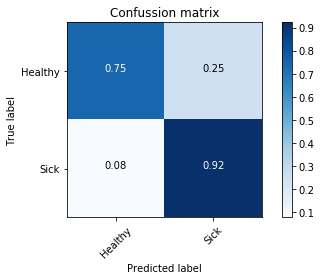

In [14]:
cm = metrics.confusion_matrix(targets, guesses)
confusion_matrix_plot(cm, ['Healthy', 'Sick'], 1)

Now we've seen the basics of a bayesian belief network however they have two strengths which we've yet to see. The first strength is how we can infere on them and the second is how expert domain knowledge can be used. We'll start with looking at the inference. Two major strengths when it comes to infering on a bbn is that we do not need the full evidence to use the model, let's say that we don't know the age or cholesterol and see what happens. 

In [15]:
guess = bnlearn.inference.fit(model_fit, variables = ['target'], evidence = { 'sex': data_test.iloc[1,1],
                                                                                'cp': data_test.iloc[1,2],
                                                                                'trestbps': data_test.iloc[1,3],                                                                           
                                                                                'fbs': data_test.iloc[1,5],
                                                                                'restecg': data_test.iloc[1,6],
                                                                                'thalach': data_test.iloc[1,7],
                                                                                'exang': data_test.iloc[1,8], 
                                                                                'oldpeak': data_test.iloc[1,9],
                                                                                'slope': data_test.iloc[1,10],
                                                                                'ca': data_test.iloc[1,11],
                                                                                'thal': data_test.iloc[1,12]})
print(np.argmax(guess.values))
print(data_test.iloc[1,:])

Eliminating: age: 100%|█████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 501.26it/s]

[BNLEARN][inference] Variable Elimination..
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.1151 |
+-----------+---------------+
| target(1) |        0.8849 |
+-----------+---------------+
1
age         1
sex         0
cp          2
trestbps    1
chol        1
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       2
ca          0
thal        0
target      1
Name: 359, dtype: object


So as we can see our model classified the sample correctly even though we did not have the full data about the sample. Another strength is that we can infere other values. Let's say that we know that the person has a disease, target = 1 and want to know where their sex and where that age span they belong to, then that is also possible with bnn.

In [16]:
guess = bnlearn.inference.fit(model_fit, variables = ['age', 'sex'], evidence = { 
                                                                                'cp': data_test.iloc[2,2],
                                                                                'trestbps': data_test.iloc[2,3],                                                                           
                                                                                'fbs': data_test.iloc[2,5],
                                                                                'restecg': data_test.iloc[2,6],
                                                                                'thalach': data_test.iloc[2,7],
                                                                                'exang': data_test.iloc[2,8], 
                                                                                'oldpeak': data_test.iloc[2,9],
                                                                                'slope': data_test.iloc[2,10],
                                                                                'ca': data_test.iloc[2,11],
                                                                                'thal': data_test.iloc[2,12],
                                                                                'target': data_test.iloc[2,13]})
print(np.argmax(guess.values))
print(data_test.iloc[2,:])

Eliminating: chol: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.82it/s]

[BNLEARN][inference] Variable Elimination..
+--------+--------+----------------+
| age    | sex    |   phi(age,sex) |
+========+========+================+
| age(0) | sex(0) |         0.0431 |
+--------+--------+----------------+
| age(0) | sex(1) |         0.1183 |
+--------+--------+----------------+
| age(1) | sex(0) |         0.1461 |
+--------+--------+----------------+
| age(1) | sex(1) |         0.4013 |
+--------+--------+----------------+
| age(2) | sex(0) |         0.0777 |
+--------+--------+----------------+
| age(2) | sex(1) |         0.2135 |
+--------+--------+----------------+
3
age         1
sex         1
cp          0
trestbps    2
chol        1
fbs         0
restecg     0
thalach     1
exang       1
oldpeak     0
slope       1
ca          1
thal        3
target      0
Name: 447, dtype: object


As we can see the model predicted the the highest probability was for the person belonging to the agespan mean +/- a standard deviation and belonging to sex labeled 1, highest probability for combination 4. When looking at the data this is indeed correct.

A second strength of bnns is that we can specify the network structure ourselves if we think that we know how how the probabilities are related. Lets take a look at the variable 'exang'. In the model above the structure learning returned that it should be conditional on 'cp' so we get the probability p(exang|cp) in said node this can then be done for any node and thereby successively building up our bayesian belief network.